# **Using Pure Numpy to build a 3 layer neural network**

In [1]:
#importing required libraries
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error

# **Function to create 3D Visualization of Data:**

In [2]:
def plot_3d(x, y, y_pred=None):
  X_reduced = TSNE(n_components=2).fit_transform(x)
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(X_reduced[:, 0], X_reduced[:, 1], y, label='True')
  if y_pred is not None:
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], y_pred, marker='v', label='Predicted')
  plt.legend()
  plt.show()

# **Generating Data:**

In [3]:
n = 200

in_dims = 3

out_dims = 2

x = np.random.uniform(-1, 1, (n, in_dims))

weights_true = np.array([[5, -1, -1], [-1,-1,3],]).T
bias_true = np.array([[1, 1]])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = (5 * x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

(200, 3) (3, 2) (1, 2)
x: (200, 3), weights: (3, 2), bias: (1, 2), y: (200, 2)


# **Plotting the data generated before training:**

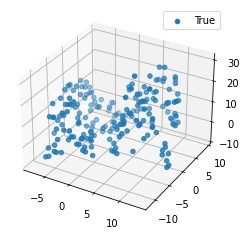

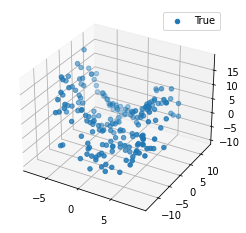

In [4]:
plot_3d(x, y_true[:,0])
plot_3d(x, y_true[:,1])

# **Adding Non Linearity usin ReLU:**

In [5]:
class Relu:
  def __call__(self, input_):
    self.input_ = input_
    self.output = np.clip(self.input_, 0, None)
    return self.output
  
  def backward(self, output_gradient):
    self.input_gradient = (self.input_ > 0) * output_gradient
    return self.input_gradient

# **Loss Function:**

In [6]:
class MSE:
  def __call__(self, y_true, y_pred):
    self.y_pred = y_pred
    self.y_true = y_true
    return((y_true - y_pred) ** 2).mean()
    
  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2.0 * (self.y_pred - self.y_true) / n
    return self.gradient

In [7]:
class Linear:
  def __init__(self, in_dims: int, hidden: int = 1):
    self.weights = np.random.randn(in_dims, hidden) * np.sqrt(2. / in_dims)
    self.bias = np.zeros((hidden))
  
  def __call__(self,x):
    self.x = x
    output = x @ self.weights + self.bias
    return output
  
  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient
  
  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

# **Implementing Model with Activation Function:**

In [8]:
class Model:
  def __init__(self, input_dim, hidden_layers):
    self.linear1 = Linear(input_dim, hidden_layers)
    self.relu = Relu()
    self.linear2 = Linear(hidden_layers, 10)
    self.relu = Relu()
    self.linear3 = Linear(10, 2)

  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu(l1)
    l2 = self.linear2(r1)
    r2 = self.relu(l2)
    l3 = self.linear3(r2)
    return l3

  def backward(self, output_gradient):
    linear3_gradient = self.linear3.backward(output_gradient)
    relu_gradient1 = self.relu.backward(linear3_gradient)
    linear2_gradient = self.linear2.backward(relu_gradient1)
    relu_gradient2 = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient2)
    return linear1_gradient

  def update(self, lr):
    self.linear3.update(lr)
    self.linear2.update(lr)
    self.linear1.update(lr)

# Defining Loss function

72.29566913607346
91.9381876872041


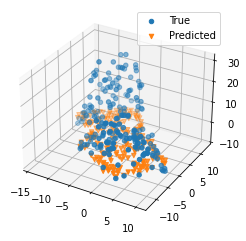

In [9]:
loss = MSE()
model = Model(3, 10)
y_pred = model(x)
loss_value = loss(y_pred,y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
plot_3d(x, y_true[:,0], y_pred[:,0])

# Training the model using Linear Model with Relu activation

In [12]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    if epoch % 40 == 0:
      print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

# Fitting the trained model

In [14]:
loss = MSE()
model_nn = Model(in_dims, 10)
y_pred = model_nn(x)
fit(x, y_true, model=model_nn, loss=loss, lr=1e-308, num_epochs=200)

Epoch 0, loss 71.86955120343677
Epoch 40, loss 71.86955120343677
Epoch 80, loss 71.86955120343677
Epoch 120, loss 71.86955120343677
Epoch 160, loss 71.86955120343677


# Visualizing data post training

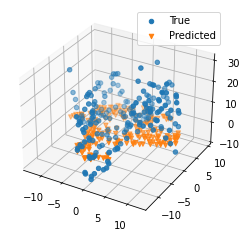

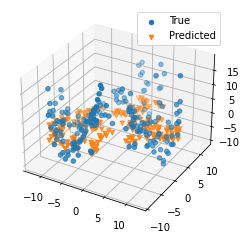

In [16]:
plot_3d(x, y_true[:,0], y_pred[:,0])
plot_3d(x, y_true[:,1], y_pred[:,1])